In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from PIL import Image
import math
from sklearn.metrics import accuracy_score,hamming_loss, accuracy_score, f1_score, precision_score, recall_score

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from textwrap import wrap


from utils import KunischMetrics
from utils import KunischPruner
from utils import DataExplorer
from utils import KunischPlotter

In [14]:
target = 'f2'
target_name = 'F2-Score'

In [15]:
nlabels = [5, 14, 26, 34, 54, 63, 72, 82, 91, 107, 131, 169, 281]
output_dir = os.path.join('..', 'outputs')
experimentos = ['alexnet_25th', 'alexnet_c13_evo', 'alexnet_75th']
conjuntos = ['blur_rain_ref_rot_elastic1']
apellidos = ['_weighted_1']
scores = {}

# Armar diccionario de experimentos
for exp in experimentos:
    for conjunto in conjuntos:
        for apellido in apellidos:
            scores[exp] = []

# Iterar sobre archivos de resultados sacando el target buscado
for n in nlabels:
    for exp in experimentos:
        for conjunto in conjuntos:
            for apellido in apellidos:
                path_predicciones = os.path.join(output_dir, exp, conjunto, f'{n}L{apellido}', 'metadata.csv')
                print(path_predicciones)
                predicciones = pd.read_csv(path_predicciones, index_col = 0)
                score = float(predicciones.loc[[target]].values[0][0])
                #print(path_predicciones, score[0][0])
                scores[exp].append(score)
scores

..\outputs\alexnet_25th\blur_rain_ref_rot_elastic1\5L_weighted_1\metadata.csv
..\outputs\alexnet_c13_evo\blur_rain_ref_rot_elastic1\5L_weighted_1\metadata.csv
..\outputs\alexnet_75th\blur_rain_ref_rot_elastic1\5L_weighted_1\metadata.csv
..\outputs\alexnet_25th\blur_rain_ref_rot_elastic1\14L_weighted_1\metadata.csv
..\outputs\alexnet_c13_evo\blur_rain_ref_rot_elastic1\14L_weighted_1\metadata.csv
..\outputs\alexnet_75th\blur_rain_ref_rot_elastic1\14L_weighted_1\metadata.csv
..\outputs\alexnet_25th\blur_rain_ref_rot_elastic1\26L_weighted_1\metadata.csv
..\outputs\alexnet_c13_evo\blur_rain_ref_rot_elastic1\26L_weighted_1\metadata.csv
..\outputs\alexnet_75th\blur_rain_ref_rot_elastic1\26L_weighted_1\metadata.csv
..\outputs\alexnet_25th\blur_rain_ref_rot_elastic1\34L_weighted_1\metadata.csv
..\outputs\alexnet_c13_evo\blur_rain_ref_rot_elastic1\34L_weighted_1\metadata.csv
..\outputs\alexnet_75th\blur_rain_ref_rot_elastic1\34L_weighted_1\metadata.csv
..\outputs\alexnet_25th\blur_rain_ref_rot_e

{'alexnet_25th': [0.8319,
  0.7744,
  0.7164,
  0.6833,
  0.6464,
  0.632,
  0.6077,
  0.6013,
  0.584,
  0.5692,
  0.5442,
  0.499,
  0.4106],
 'alexnet_c13_evo': [0.8217,
  0.769,
  0.7168,
  0.6835,
  0.6507,
  0.6395,
  0.6302,
  0.6144,
  0.6084,
  0.584,
  0.5598,
  0.5279,
  0.4321],
 'alexnet_75th': [0.7978,
  0.7529,
  0.6895,
  0.6703,
  0.638,
  0.631,
  0.6207,
  0.6196,
  0.6051,
  0.5883,
  0.578,
  0.5364,
  0.4711]}

In [16]:
plt.rcParams.update({'font.size': 6})
plt.rcParams['figure.dpi'] = 1000
plotter = KunischPlotter()

In [17]:
lista_valores = list(scores.values())
display(lista_valores)
print(np.average(lista_valores))

[[0.8319,
  0.7744,
  0.7164,
  0.6833,
  0.6464,
  0.632,
  0.6077,
  0.6013,
  0.584,
  0.5692,
  0.5442,
  0.499,
  0.4106],
 [0.8217,
  0.769,
  0.7168,
  0.6835,
  0.6507,
  0.6395,
  0.6302,
  0.6144,
  0.6084,
  0.584,
  0.5598,
  0.5279,
  0.4321],
 [0.7978,
  0.7529,
  0.6895,
  0.6703,
  0.638,
  0.631,
  0.6207,
  0.6196,
  0.6051,
  0.5883,
  0.578,
  0.5364,
  0.4711]]

0.6291564102564102


In [23]:
display(np.average(lista_valores[2]))

0.6306692307692308

In [24]:
valores = lista_valores[0]
auc = 0
for i in range(len(valores)-1):
    score_init = valores[i]
    score_final = valores[i+1]
    low_score = min(score_init, score_final)
    high_score = max(score_init, score_final)
    rectangulo = low_score * (nlabels[i+1] - nlabels[i]) 
    triangulo = high_score * (nlabels[i+1] - nlabels[i])/2
    auc += rectangulo + triangulo
auc


222.87619999999998

D:\Escritorio\Semestre-envs\TesisMV\notebooks\utils.py:260: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


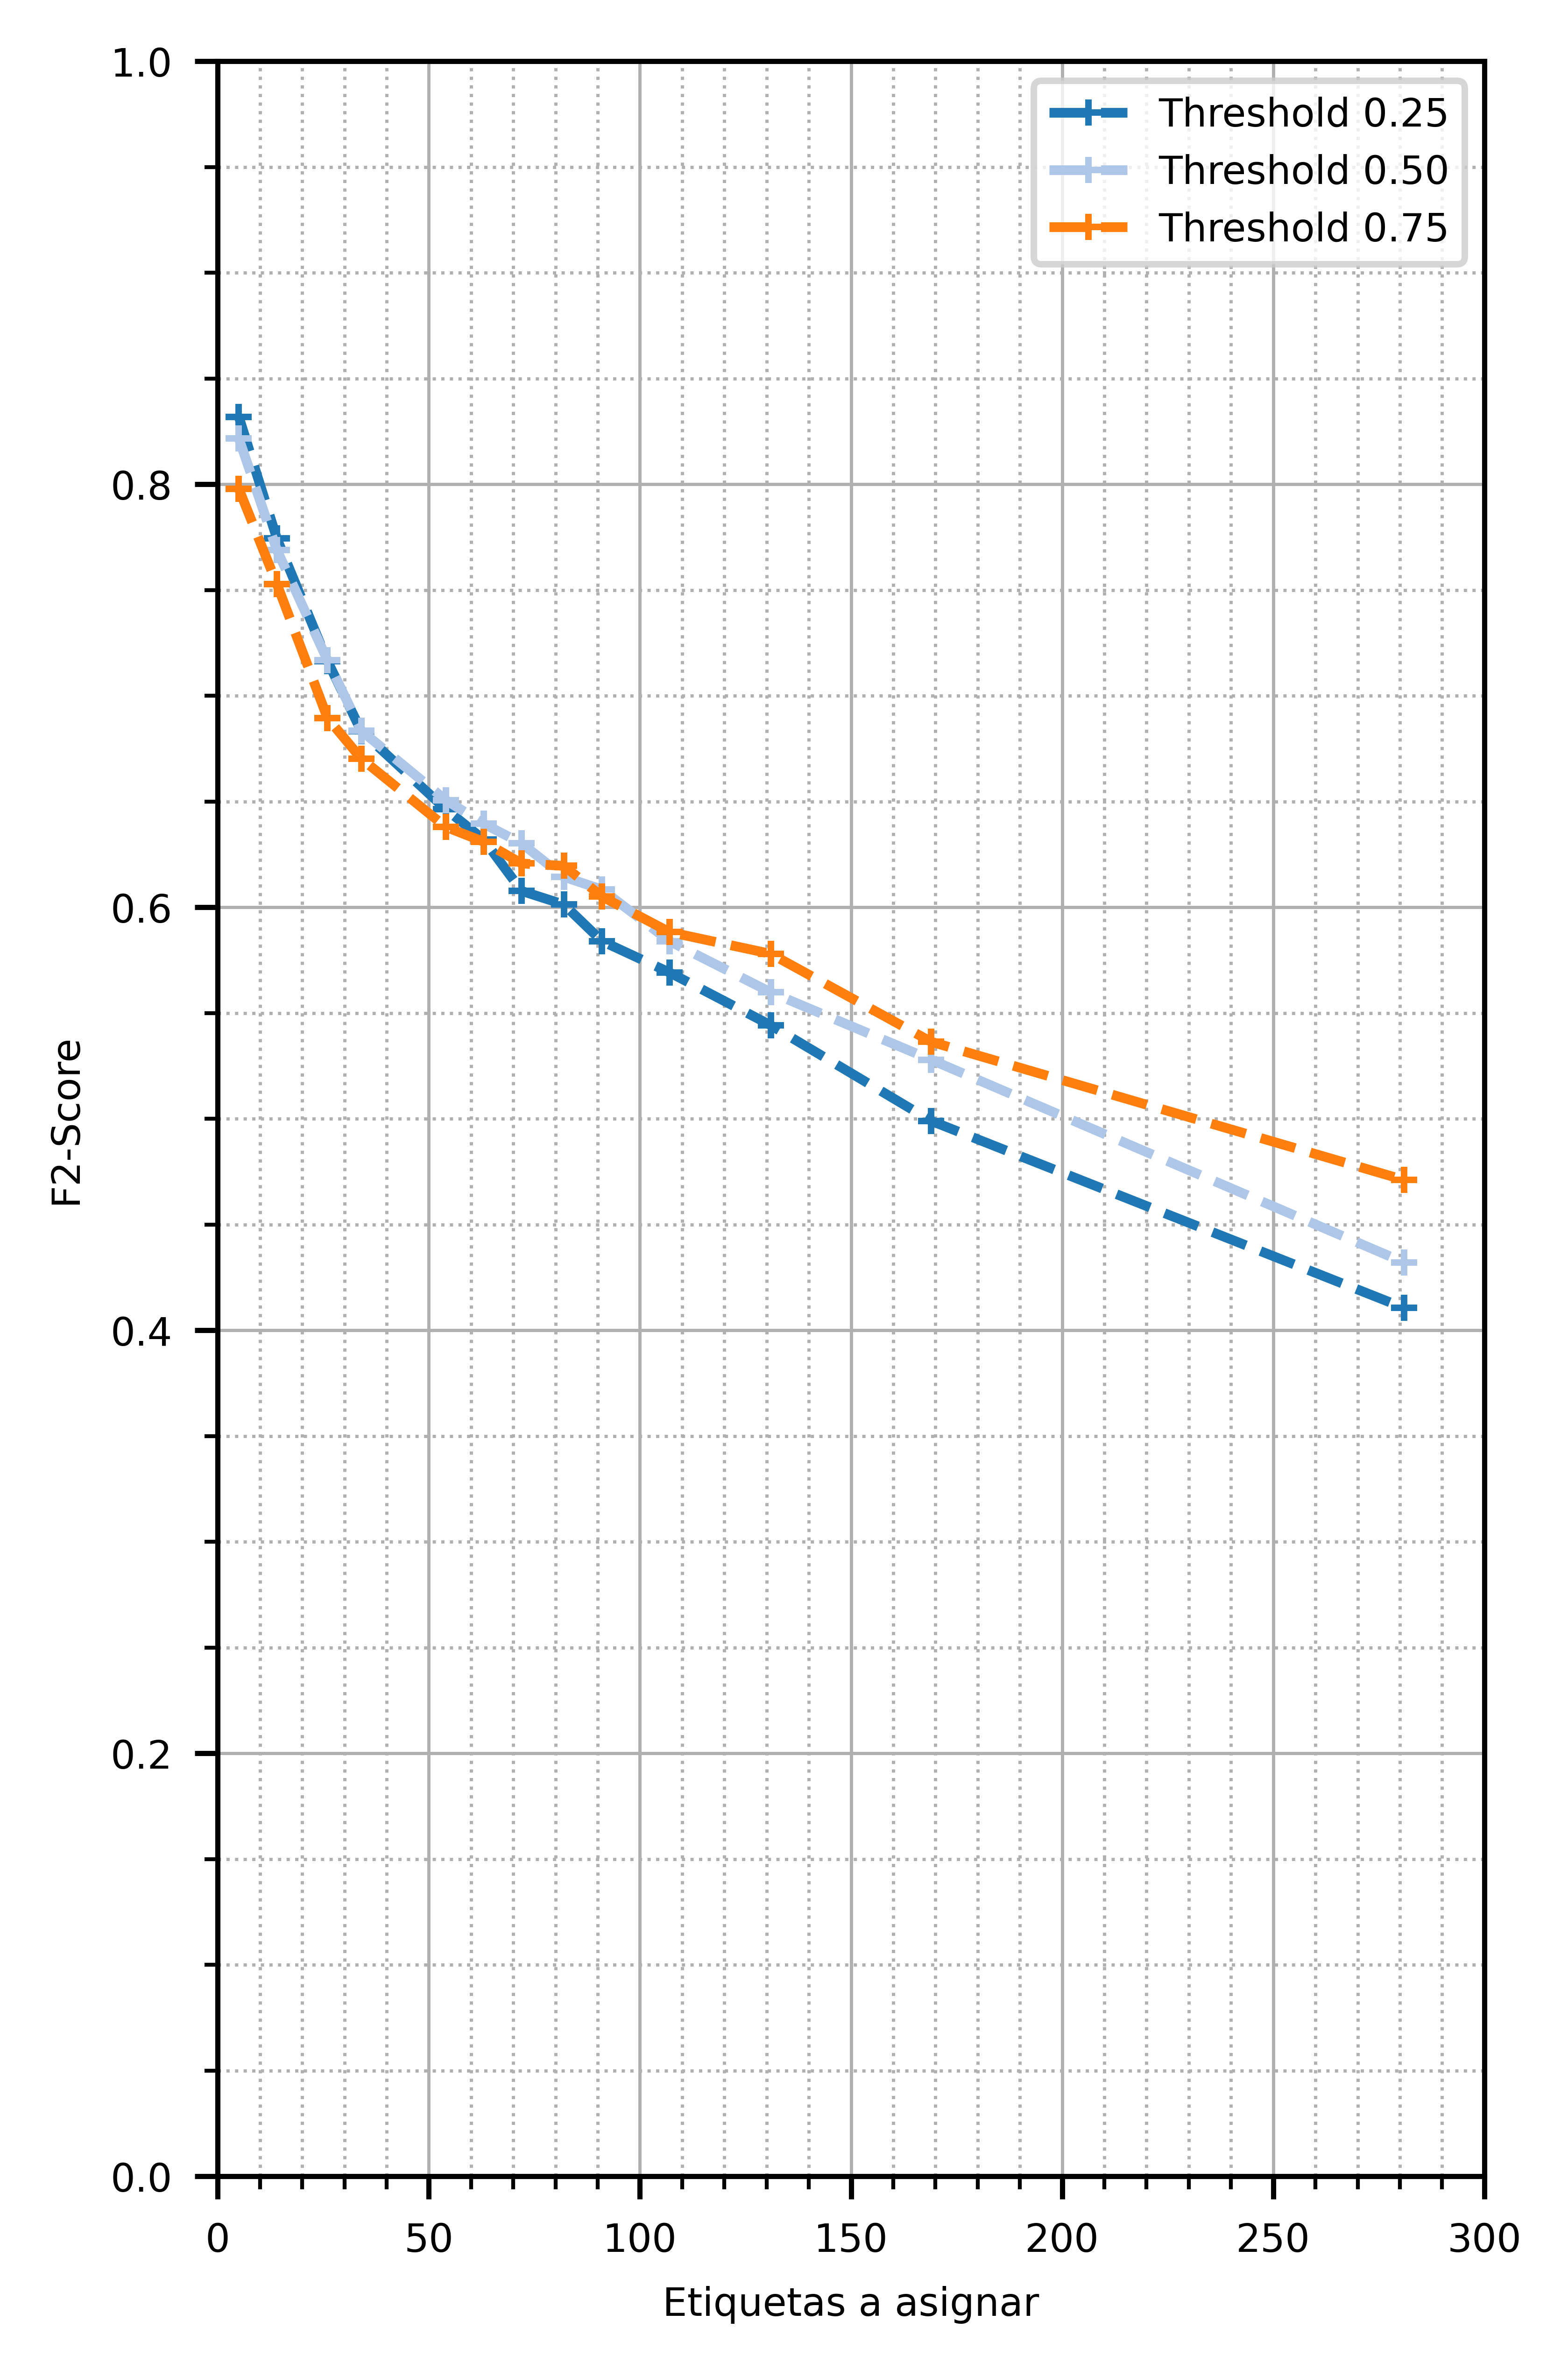

In [25]:
### labels = ['Threshold 0.25', 'Threshold 0.50', 'Threshold 0.75']
plotter.plot_results(nlabels,
             score = list(scores.values()),
             label = labels,
             #title = target_name + ' v/s Cantidad de Etiquetas',
             xlabel = "Etiquetas a asignar", ylabel = target_name,
             ylim = 1.0,
             xlim = 300,
            width = 3.5,
             height = 6,
             grid = True,
             minorgrid = True,
             order = [0, 1, 2])

In [8]:
nlabels = [5, 14, 26, 34, 54, 63, 72, 82, 91, 107, 131, 169, 281]
output_dir = os.path.join('..', 'outputs')
experimentos = ['alexnet_25th', 'alexnet_c13_evo', 'alexnet_75th']
conjuntos = ['blur_rain_ref_rot_elastic1']
apellidos = ['_weighted_1']
targets = ['f2', 'recall', 'precision', 'hs', 'emr', 'mr5']

scores = {}

# Armar diccionario de experimentos
for n in nlabels:
    for exp in experimentos:
        for conjunto in conjuntos:
            scores[exp + ';' + conjunto + ';' + str(n)] = {}

# Iterar sobre archivos de resultados sacando el target buscado
for n in nlabels:
    for exp in experimentos:
            for conjunto in conjuntos:
                path_predicciones = os.path.join(output_dir, exp, conjunto, f'{n}L{apellido}', 'metadata.csv')
                predicciones = pd.read_csv(path_predicciones, index_col = 0)
                for target in targets:
                    score = float(predicciones.loc[[target]].values[0][0])
                    scores[exp + ';' + conjunto + ';' + str(n)][target] = score

da_map = {
    'base': 0,
    'rot': 1,
    'ref': 2,
    'crop1': 3,
    'elastic1': 4,
    'rain': 5,
    'randaug1': 6,
    'gausblur1': 7,
    'blur': 8,
    'mtnblur': 9,
    'ref_rot': 10,
    'rain_ref_rot': 11,
    'rain_ref_rot_elastic1': 12,
    'blur_rain_ref_rot_elastic1': 13,
    'blur_rain_ref_rot_crop1_elastic1': 14,
    'blur_rain_ref_rot_crop1_randaug1_elastic1': 15,
}

scores

{'alexnet_25th;blur_rain_ref_rot_elastic1;5': {'f2': 0.8319,
  'recall': 0.8525,
  'precision': 0.7593,
  'hs': 0.7175,
  'emr': 0.5812,
  'mr5': 0.8183},
 'alexnet_c13_evo;blur_rain_ref_rot_elastic1;5': {'f2': 0.8217,
  'recall': 0.8314,
  'precision': 0.7862,
  'hs': 0.7048,
  'emr': 0.5954,
  'mr5': 0.7861},
 'alexnet_75th;blur_rain_ref_rot_elastic1;5': {'f2': 0.7978,
  'recall': 0.7909,
  'precision': 0.8284,
  'hs': 0.7332,
  'emr': 0.6134,
  'mr5': 0.759},
 'alexnet_25th;blur_rain_ref_rot_elastic1;14': {'f2': 0.7744,
  'recall': 0.8267,
  'precision': 0.6186,
  'hs': 0.5787,
  'emr': 0.2126,
  'mr5': 0.6611},
 'alexnet_c13_evo;blur_rain_ref_rot_elastic1;14': {'f2': 0.769,
  'recall': 0.798,
  'precision': 0.672,
  'hs': 0.6128,
  'emr': 0.2784,
  'mr5': 0.6108},
 'alexnet_75th;blur_rain_ref_rot_elastic1;14': {'f2': 0.7529,
  'recall': 0.7644,
  'precision': 0.7106,
  'hs': 0.6135,
  'emr': 0.2835,
  'mr5': 0.5786},
 'alexnet_25th;blur_rain_ref_rot_elastic1;26': {'f2': 0.7164,
  '

In [9]:
df = pd.DataFrame.from_dict(scores, orient='index')

In [10]:
etiquetas = list(map(lambda x: x.split(';')[2], list(df.index.values)))
threshold = list(map(lambda x: x.split(';')[0], list(df.index.values)))
thresholds = {
    'alexnet_25th': '0.25',
    'alexnet_c13_evo': '0.50',
    'alexnet_75th': '0.75'
}
threshold = list(map(lambda x: thresholds[x], threshold))
df['etiquetas'] = etiquetas
df['threshold'] = threshold
df['conjunto'] = [da_map[x.split(';')[1]] for x in list(df.index.values)]
df = df[['conjunto', 'etiquetas', 'threshold', 'f2', 'recall', 'precision', 'hs', 'emr', 'mr5']]
df

,conjunto,etiquetas,threshold,f2,recall,precision,hs,emr,mr5
alexnet_25th;blur_rain_ref_rot_elastic1;5,13,5,0.25,0.8319,0.8525,0.7593,0.7175,0.5812,0.8183
alexnet_c13_evo;blur_rain_ref_rot_elastic1;5,13,5,0.50,0.8217,0.8314,0.7862,0.7048,0.5954,0.7861
alexnet_75th;blur_rain_ref_rot_elastic1;5,13,5,0.75,0.7978,0.7909,0.8284,0.7332,0.6134,0.7590
alexnet_25th;blur_rain_ref_rot_elastic1;14,13,14,0.25,0.7744,0.8267,0.6186,0.5787,0.2126,0.6611
alexnet_c13_evo;blur_rain_ref_rot_elastic1;14,13,14,0.50,0.7690,0.7980,0.6720,0.6128,0.2784,0.6108
alexnet_75th;blur_rain_ref_rot_elastic1;14,13,14,0.75,0.7529,0.7644,0.7106,0.6135,0.2835,0.5786
alexnet_25th;blur_rain_ref_rot_elastic1;26,13,26,0.25,0.7164,0.8041,0.4998,0.4712,0.0593,0.5915
alexnet_c13_evo;blur_rain_ref_rot_elastic1;26,13,26,0.50,0.7168,0.7674,0.5677,0.5103,0.1005,0.5232
alexnet_75th;blur_rain_ref_rot_elastic1;26,13,26,0.75,0.6895,0.7031,0.6406,0.5261,0.1482,0.4484
alexnet_25th;blur_rain_ref_rot_elastic1;34,13,34,0.25,0.6833,0.7950,0.4374,0.4193,0.0322,0.5567


In [11]:
df.to_csv("experimento7.csv")